# Personalización de tick

Los formateadores y localizadores de ticks predeterminados de Matplotlib están diseñados para ser suficientes en muchas situaciones comunes, pero de ninguna manera son óptimos para cada gráfico. Esta sección brindará varios ejemplos de cómo ajustar las ubicaciones de las marcas y el formato para el tipo de gráfico en particular que le interesa.
Antes de pasar a los ejemplos, será mejor que comprendamos más la jerarquía de objetos de los diagramas de Matplotlib.
Matplotlib tiene como objetivo tener un objeto de Python que represente todo lo que aparece en la trama: por ejemplo, recuerde que la ``figura`` es el cuadro delimitador dentro del cual aparecen los elementos de la trama.
Cada objeto de Matplotlib también puede actuar como un contenedor de subobjetos: por ejemplo, cada ``figura`` puede contener uno o más objetos ``ejes``, cada uno de los cuales a su vez contiene otros objetos que representan el contenido de la trama.
Las marcas de verificación no son una excepción. Cada ``ejes`` tiene atributos ``xaxis`` y ``yaxis``, que a su vez tienen atributos que contienen todas las propiedades de las líneas, marcas y etiquetas que componen los ejes.

## Marcas mayores y menores
Dentro de cada eje, existe el concepto de una marca de verificación *principal* y una marca de verificación *menor*. Como implican los nombres, los ticks principales suelen ser más grandes o más pronunciados, mientras que los ticks menores suelen ser más pequeños. De forma predeterminada, Matplotlib rara vez utiliza ticks menores, pero un lugar donde puede verlos es dentro de gráficos logarítmicos:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

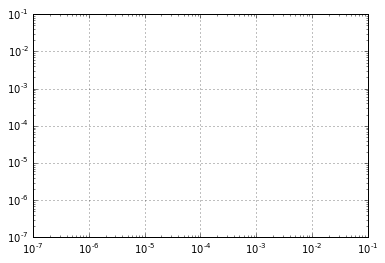

In [ ]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

Vemos aquí que cada marca principal muestra una marca grande y una etiqueta, mientras que cada marca secundaria muestra una marca más pequeña sin etiqueta.
Estas propiedades de marcas (ubicaciones y etiquetas) se pueden personalizar configurando los objetos ``formatter`` y ``locator`` de cada eje. Examinemos estos para el eje x de la gráfica que se acaba de mostrar:

In [ ]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [ ]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

Vemos que las etiquetas de ticks mayores y menores tienen sus ubicaciones especificadas por un ``LogLocator`` (que tiene sentido para un gráfico logarítmico). Sin embargo, los ticks menores tienen sus etiquetas formateadas por un ``NullFormatter``: esto dice que no se mostrarán etiquetas.
Ahora mostraremos algunos ejemplos de configuración de estos localizadores y formateadores para varias parcelas.

## Ocultar marcas o etiquetas
Quizás la operación de formato de marca/etiqueta más común es el acto de ocultar marcas o etiquetas.
Esto se puede hacer usando ``plt.NullLocator()`` y ``plt.NullFormatter()``, como se muestra aquí:

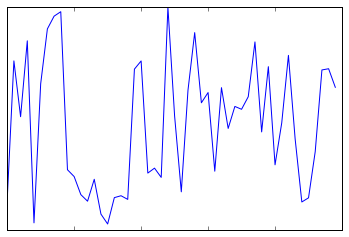

In [ ]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Tenga en cuenta que eliminamos las etiquetas (pero mantuvimos las marcas/líneas de cuadrícula) del eje x y eliminamos las marcas (y, por lo tanto, también las etiquetas) del eje y.
No tener marcas en absoluto puede ser útil en muchas situaciones, por ejemplo, cuando desea mostrar una cuadrícula de imágenes.
Por ejemplo, considere la siguiente figura, que incluye imágenes de diferentes caras, un ejemplo que se usa a menudo en problemas de aprendizaje automático supervisado (consulte, por ejemplo, [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)):

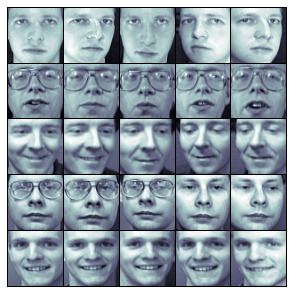

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

Tenga en cuenta que cada imagen tiene sus propios ejes, y hemos establecido los localizadores en nulo porque los valores de marca (número de píxel en este caso) no transmiten información relevante para esta visualización en particular.

## Reducir o aumentar el número de ticks
Un problema común con la configuración predeterminada es que las subparcelas más pequeñas pueden terminar con etiquetas abarrotadas.
Podemos ver esto en la cuadrícula de la trama que se muestra aquí:

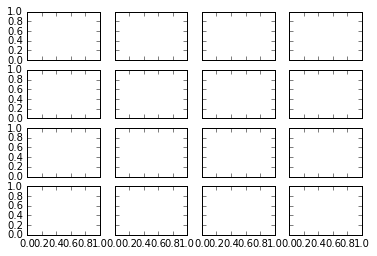

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Particularmente para las marcas x, los números casi se superponen y los hacen bastante difíciles de descifrar.
Podemos arreglar esto con ``plt.MaxNLocator()``, que nos permite especificar el número máximo de ticks que se mostrarán.
Dado este número máximo, Matplotlib utilizará la lógica interna para elegir las ubicaciones de marca particulares:

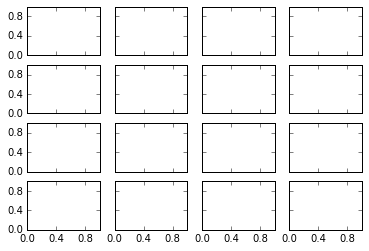

In [ ]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

Esto hace que las cosas sean mucho más limpias. Si desea aún más control sobre las ubicaciones de los ticks espaciados regularmente, también puede usar ``plt.MultipleLocator``, que discutiremos en la siguiente sección.

## Formatos elegantes de ticks
El formato de marca predeterminado de Matplotlib puede dejar mucho que desear: funciona bien como un valor predeterminado amplio, pero a veces le gustaría hacer algo más.
Considere esta gráfica de un seno y un coseno:

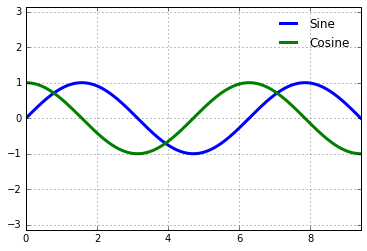

In [ ]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

Hay un par de cambios que nos gustaría hacer. Primero, es más natural que estos datos espacien las marcas y las líneas de cuadrícula en múltiplos de $\pi$. Podemos hacer esto configurando un ``MultipleLocator``, que ubica los ticks en un múltiplo del número que proporcionas. Por si acaso, agregaremos ticks mayores y menores en múltiplos de $\pi/4$:

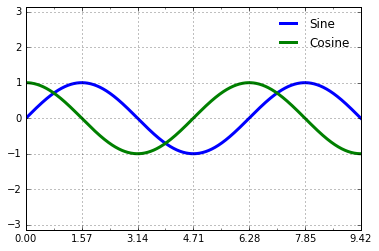

In [ ]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

Pero ahora estas etiquetas de ticks parecen un poco tontas: podemos ver que son múltiplos de $\pi$, pero la representación decimal no transmite esto inmediatamente.
Para arreglar esto, podemos cambiar el formateador de ticks. No hay un formateador incorporado para lo que queremos hacer, así que en su lugar usaremos ``plt.FuncFormatter``, que acepta una función definida por el usuario que brinda un control detallado sobre las salidas de tick:

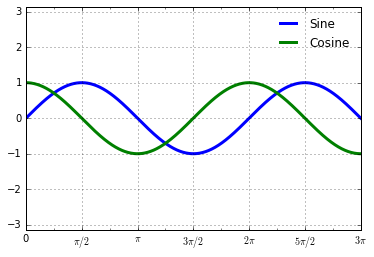

In [ ]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

¡Esto es mucho mejor! Tenga en cuenta que hemos utilizado la compatibilidad con LaTeX de Matplotlib, que se especifica encerrando la cadena entre signos de dólar. Esto es muy conveniente para mostrar símbolos y fórmulas matemáticas: en este caso, ``"$\pi$"`` se representa como el carácter griego $\pi$.
El ``plt.FuncFormatter()`` ofrece un control extremadamente detallado sobre la apariencia de las marcas de su trama, y ​​es muy útil cuando prepara tramas para presentación o publicación.

## Resumen de formateadores y localizadores
Hemos mencionado un par de formateadores y localizadores disponibles.
Concluiremos esta sección enumerando brevemente todas las opciones integradas de localizador y formateador. Para obtener más información sobre cualquiera de estos, consulte las cadenas de documentación o la documentación en línea de Matplotlib.
Cada uno de los siguientes está disponible en el espacio de nombres ``plt``:


Clase de localizador | Descripción
---------------------|-------------
``NullLocator``      | No ticks
``FixedLocator``     | Las ubicaciones de las ticks son fijas
``IndexLocator``     |Localizador para gráficas de índice (p. ej., donde x = range(len(y)))
``LinearLocator``    | Ticks espaciadas uniformemente de min a max
``LogLocator``       | Marcas logarítmicas de min a max
``MultipleLocator``  | Los ticks y el rango son un múltiplo de la base
``MaxNLocator``      | Encuentra hasta un número máximo de ticks en lugares agradables
``AutoLocator``      | (Predeterminado). MaxNLocator con valores predeterminados simples.
``AutoMinorLocator`` | Localizador de ticks menores

Formatter Class       | Descripción
----------------------|---------------
``NullFormatter``     | Sin etiquetas en las ticks
``IndexFormatter``    | Establecer las cadenas de una lista de etiquetas
``FixedFormatter``    | Establecer las cadenas manualmente para las etiquetas
``FuncFormatter``     | La función definida por el usuario establece las etiquetas
``FormatStrFormatter``| Use una cadena de formato para cada valor
``ScalarFormatter``   | (Predeterminado). Formateador para valores escalares
``LogFormatter``      | Formateador predeterminado para ejes de registro


Veremos más ejemplos de estos en el resto del libro.